In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import scipy
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)


In [2]:
print("pandas version " + pd.__version__)
print("numpy version " + np.__version__)
print("scipy version " + scipy.__version__)
print("seaborn version " + sns.__version__)
print("statsmodels version " + sm.__version__)

pandas version 1.2.4
numpy version 1.20.1
scipy version 1.6.2
seaborn version 0.11.1
statsmodels version 0.12.2


In [3]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [7]:
#check for missing data
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

In [8]:
#check for duplicate data in columns
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [9]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

False

In [10]:
# drop demographic data
df = df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job'], axis=1)

In [11]:
# verify columns were dropped
df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [12]:
#view descriptive statistics
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [13]:
df.rename(columns={'Item1':'Timely response','Item2':'Timely fixes','Item3':'Timely replacements','Item4':'Reliability','Item5':'Options','Item6':'Respectful response','Item7':'Courteous exchange','Item8':'Evidence of active listening'},inplace=True)

In [14]:
df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [15]:
newdf=df[['Age','Reliability','Children','Income','Evidence of active listening','Yearly_equip_failure','Contract','Techie','Churn']].copy()
newdf

,Age,Reliability,Children,Income,Evidence of active listening,Yearly_equip_failure,Contract,Techie,Churn
0,68,3,0,28561.99,4,1,One year,No,No
1,27,3,1,21704.77,4,1,Month-to-month,Yes,Yes
2,50,4,4,9609.57,3,1,Two Year,Yes,No
3,48,2,1,18925.23,3,0,Two Year,Yes,No
4,83,3,0,40074.19,5,1,Month-to-month,No,Yes
...,...,...,...,...,...,...,...,...,...
9995,23,3,3,55723.74,3,0,Month-to-month,No,No
9996,48,4,4,34129.34,5,0,Two Year,No,No
9997,48,4,1,45983.43,5,0,Month-to-month,No,No
9998,39,4,1,16667.58,4,0,Two Year,No,No


In [16]:
#change yes/no to 1/0
newdf = newdf.replace(to_replace = ['Yes','No'],value = [1,0])

In [17]:
#change Contract, Techie and Churn columns to numeric
newdf['Contract'].replace(('One year','Month-to-month','Two Year'), (0,1,2), inplace=True)

In [18]:
newdf

,Age,Reliability,Children,Income,Evidence of active listening,Yearly_equip_failure,Contract,Techie,Churn
0,68,3,0,28561.99,4,1,0,0,0
1,27,3,1,21704.77,4,1,1,1,1
2,50,4,4,9609.57,3,1,2,1,0
3,48,2,1,18925.23,3,0,2,1,0
4,83,3,0,40074.19,5,1,1,0,1
...,...,...,...,...,...,...,...,...,...
9995,23,3,3,55723.74,3,0,1,0,0
9996,48,4,4,34129.34,5,0,2,0,0
9997,48,4,1,45983.43,5,0,1,0,0
9998,39,4,1,16667.58,4,0,2,0,0


In [19]:
#export prepared dataset
newdf.to_csv('prepared_d209task2.csv', index = False)

In [39]:
#scale data
predictors = newdf.columns[newdf.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler=StandardScaler()

In [40]:
newdf[predictors] = scaler.fit_transform(newdf[predictors])

In [41]:
#convert target variable to numeric
newdf['Churn']=df.Churn.map(dict(Yes=1, No=0))

In [42]:
#show scaled data
newdf.head()

,Age,Reliability,Children,Income,Evidence of active listening,Yearly_equip_failure,Contract,Techie,Churn
0,0.720925,-0.485004,-0.972338,-0.398778,0.490384,0.946658,-1.535870,-0.449198,0
1,-1.259957,-0.485004,-0.506592,-0.641954,0.490384,0.946658,-0.050503,2.226191,1
2,-0.148730,0.489878,0.890646,-1.070885,-0.481828,0.946658,1.434865,2.226191,0
3,-0.245359,-1.459886,-0.506592,-0.740525,-0.481828,-0.625864,1.434865,2.226191,0
4,1.445638,-0.485004,-0.972338,0.009478,1.462596,0.946658,-0.050503,-0.449198,1


In [24]:
train , test = train_test_split(newdf,test_size=0.20, random_state=42)
x_train=train.drop('Churn',axis=1)
y_train=train['Churn']
x_test=test.drop('Churn',axis=1)
y_test=test['Churn']

In [25]:
#export test and train files
x_train.to_csv(r'C:\Users\Ibrahim\Desktop\churn_Xtrain-Task2.csv',index=False)
x_test.to_csv(r'C:\Users\Ibrahim\Desktop\churn_Xtest-Task2.csv',index=False)
y_train.to_csv(r'C:\Users\Ibrahim\Desktop\churn_Ytrain-Task2.csv',index=False)
y_test.to_csv(r'C:\Users\Ibrahim\Desktop\churn_Ytest-Task2.csv',index=False)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf=RandomForestClassifier (bootstrap=True, class_weight=None, criterion='gini',
    max_depth=None, max_features='sqrt', max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
    oob_score=False, random_state=None, verbose=0,
    warm_start=False)
clf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=1)

In [28]:
#Saving predictions
y_pred=clf.predict(x_test)

In [29]:
#Showing predictions vs actual
pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(15)

,Predicted,Actual
6252,0,0
4684,0,1
1731,0,1
4742,0,0
4521,0,0
6340,0,0
576,0,0
5202,0,0
6363,0,0
439,0,0


In [30]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1456
           1       0.39      0.14      0.21       544

    accuracy                           0.71      2000
   macro avg       0.57      0.53      0.51      2000
weighted avg       0.65      0.71      0.65      2000



In [31]:
#Show accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7065


In [32]:
#Show recall Score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.7065

In [33]:
#Show precision Score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.6457534340678677

In [34]:
#Show F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6534041299107755

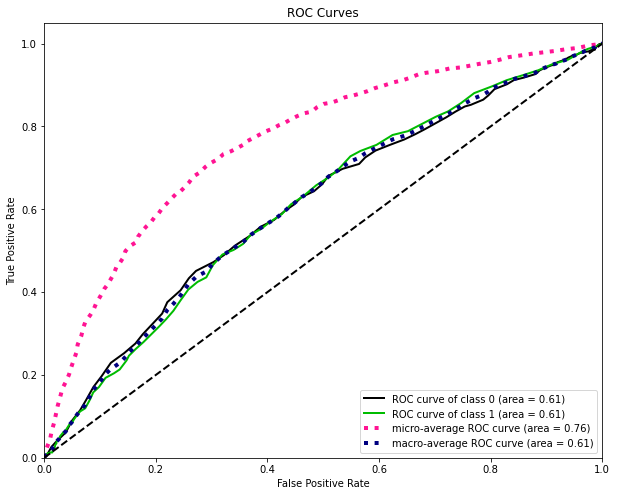

In [35]:
#Visualize ROC Curve
import matplotlib.pyplot as plt
import scikitplot as skplt

y_probas=clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))
plt.show()

In [36]:
#Determine AUC
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
# probs = y_probas[:, 1]
# print ('ROC AUC =', roc_auc_score(y_test, probs, multi_class='ovo'))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [37]:
#Area Under Curve
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5295632676147383

In [38]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.2935